# Titanic
## Background of the project
"Titanic" is a 1997 American epic romance and disaster film directed, written, produced, and co-edited by James Cameron. The plot centers on the fictional RMS Titanic, a British passenger liner, which sinks in the North Atlantic Ocean after striking an iceberg during her maiden voyage from Southampton, England, to New York City, United States. The movie stars Kate Winslet and Leonardo DiCaprio as members of different social classes who fall in love aboard the ship during its ill-fated maiden voyage. The film also features Billy Zane, Kathy Bates, Frances Fisher, Gloria Stuart, Bernard Hill, Jonathan Hyde, Victor Garber, and Bill Paxton.

In order to relfect the realities of early 1900s cruise across the Atlantic, James Cameron compiled a now-famous data set of 2224 passengers and crew. He then assumed that there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 people.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. The goal of this notebook is to try assessing the factors that might have led to survival, and predicting the fate of each passenger.

## Goals for the project
Jokes aside, this project is meant to be a training in:
- Techniques for binary classification
- Kaggle
- Jupyter Notebooks in Visual Studio Code

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

sns.set_theme(style = "dark")

## Data set
Source: https://www.kaggle.com/competitions/titanic/data

In [4]:
titanic_df = pd.read_csv("titanic.csv")

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The data set contains the following variables:

- `PassengerId`
- `Survived` (`0` = passenger died, `1` = passenger survived)
- `Pclass`: Ticket class (`1` = 1st, `2` = 2nd, `3` = 3rd)
- `Name`
- `Sex`: (`male`, `female`)
- `Age`: Age in years
- `SibSp`: Number of siblings or spouses aboard the Titanic
- `Parch`: Number of parents or children aboard the Titanic
- `Ticket`: Ticket number
- `Fare`: Passenger fare
- `Cabin`: Cabin number
- `Embarked`: Port of embarkation (`C` = Cherbourg, `Q` = Queenstown, `S` = Southampton)

In [6]:
n_total = len(titanic_df)
n_survivors = sum(titanic_df.Survived == 1)
n_casualties = sum(titanic_df.Survived == 0)

In [7]:
print("Out of {} passengers, {} ({:.0%}) survived, and {} ({:.0%}) died."
      .format(n_total, n_survivors, n_survivors / n_total, n_casualties, n_casualties / n_total))

Out of 891 passengers, 342 (38%) survived, and 549 (62%) died.


## Data exploration
Let's analyse the distribution of some potentially useful variables.

[Text(0.5, 1.0, 'Number of passengers by ticket class'),
 Text(0.5, 0, 'Ticket class'),
 Text(0, 0.5, 'Number of passengers')]

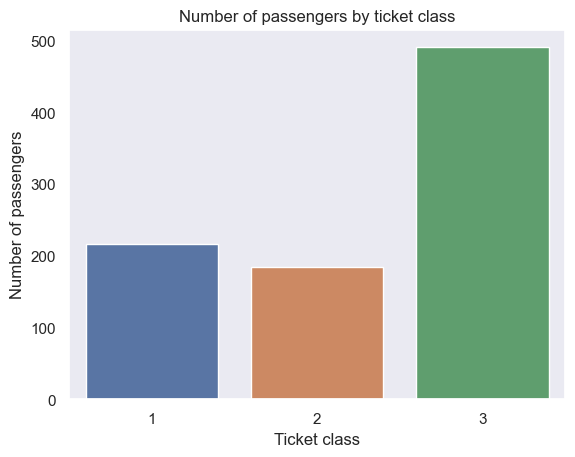

In [8]:
sns.countplot(x = "Pclass", data = titanic_df).set(
    title = "Number of passengers by ticket class",
    xlabel = "Ticket class",
    ylabel = "Number of passengers")

Around half of the passengers were in the third class.

[Text(0.5, 1.0, 'Number of passengers by survival status and ticket class'),
 Text(0.5, 0, 'Ticket class'),
 Text(0, 0.5, 'Number of passengers')]

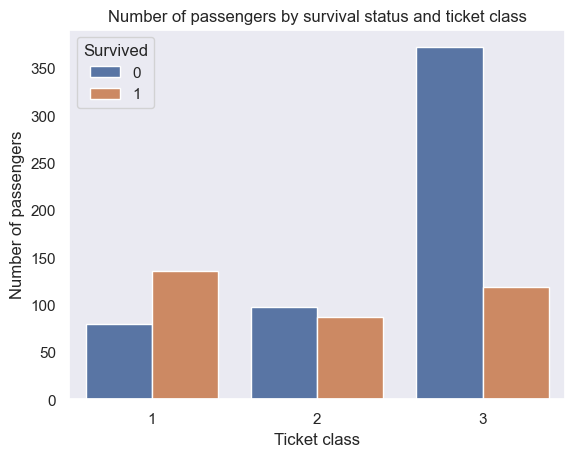

In [9]:
sns.countplot(x = "Pclass", hue = "Survived", data = titanic_df).set(
    title = "Number of passengers by survival status and ticket class",
    xlabel = "Ticket class",
    ylabel = "Number of passengers")

It seems that the ticket class might have an impact of the survival. In class 1 most passengers survived. In class 2 it was slightly fewer than a half. In class 3 it was only about a quarter.

[Text(0.5, 1.0, 'Number of passengers by survival status and the number of siblings or spouses on board'),
 Text(0.5, 0, 'Number of siblings or spouses on board'),
 Text(0, 0.5, 'Number of passengers')]

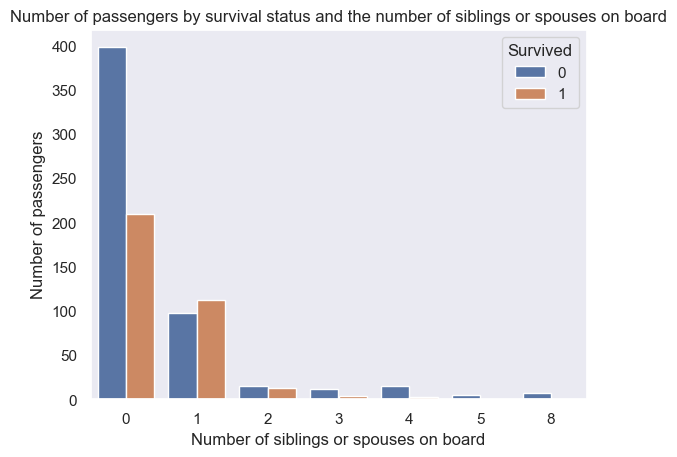

In [10]:
sns.countplot(x = "SibSp", hue = "Survived", data = titanic_df).set(
    title = "Number of passengers by survival status and the number of siblings or spouses on board",
    xlabel = "Number of siblings or spouses on board",
    ylabel = "Number of passengers")

[Text(0.5, 1.0, 'Number of passengers by survival status and the number of parents or children on board'),
 Text(0.5, 0, 'Number of parents or children on board'),
 Text(0, 0.5, 'Number of passengers')]

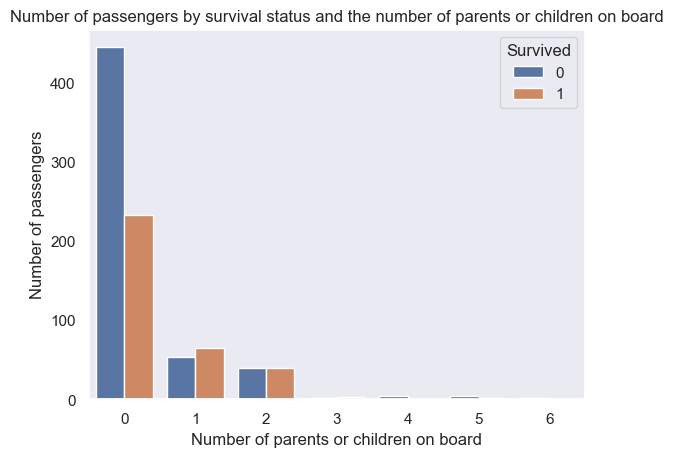

In [11]:
sns.countplot(x = "Parch", hue = "Survived", data = titanic_df).set(
    title = "Number of passengers by survival status and the number of parents or children on board",
    xlabel = "Number of parents or children on board",
    ylabel = "Number of passengers")

There is a reason to suspect that the number of family members on board is positively correlated with the chance of survival.

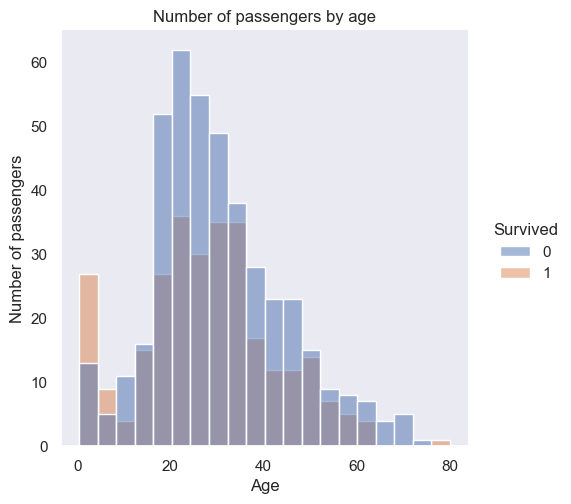

In [26]:
sns.displot(titanic_df, x = "Age", hue = "Survived").set(
    title = "Number of passengers by age",
    xlabel = "Age",
    ylabel = "Number of passengers")

When it comes to age, the ratio of those who managed to survive seems higher for children, teenagers, and people in their fifties.

[Text(0.5, 1.0, 'Number of passengers by survival status and sex'),
 Text(0.5, 0, 'Sex'),
 Text(0, 0.5, 'Number of passengers')]

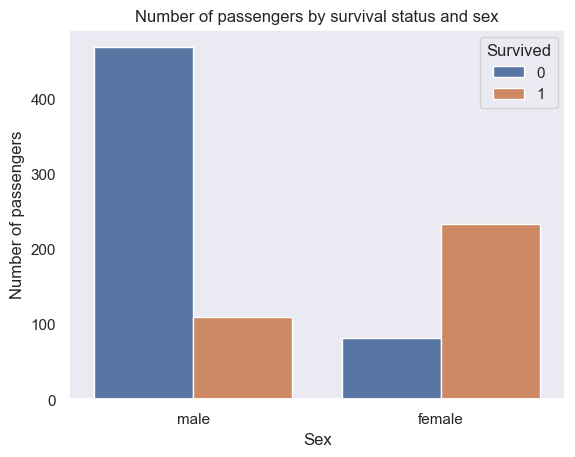

In [25]:
sns.countplot(x = "Sex", hue = "Survived", data = titanic_df).set(
    title = "Number of passengers by survival status and sex",
    xlabel = "Sex",
    ylabel = "Number of passengers")

Based on the frequencies alone, it is likely that sex is correlated with the chance of survival. Whily only a fraction of males have survived, most females did.

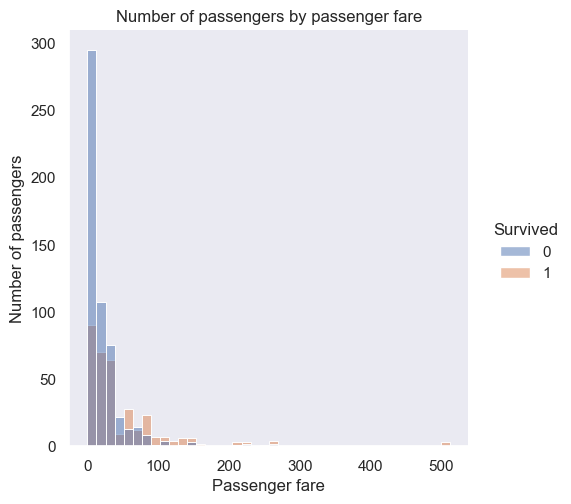

In [28]:
sns.displot(titanic_df, x = "Fare", hue = "Survived", bins = 40).set(
    title = "Number of passengers by passenger fare",
    xlabel = "Passenger fare",
    ylabel = "Number of passengers")

The higher the fare, the greater the chance of survival seems to be. This effect is likely already explained by the ticket class variable.

## Data cleaning
Let's create a heatmap of variables to see which have missing data.

[Text(0.5, 1.0, 'Visualisation of missing variables by passenger'),
 Text(0.5, 20.049999999999997, 'Variable'),
 Text(74.44444444444444, 0.5, 'Passenger')]

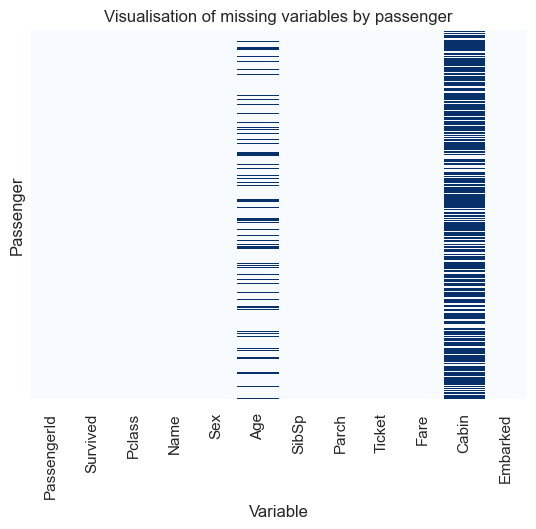

In [36]:
(sns
 .heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap = "Blues")
 .set(
    title = "Visualisation of missing variables by passenger",
    xlabel = "Variable",
    ylabel = "Passenger"))

Let's drop this one as a lot of data seems to be missing:

In [37]:
titanic_df.drop("Cabin", axis = 1, inplace = True)

Let's drop these four variables as there would be no explanation for including them:

In [38]:
titanic_df.drop(["Name", "Ticket", "Embarked", "PassengerId"], axis = 1, inplace = True)

[Text(0.5, 1.0, 'Visualisation of missing variables by passenger'),
 Text(0.5, 20.049999999999997, 'Variable'),
 Text(74.44444444444444, 0.5, 'Passenger')]

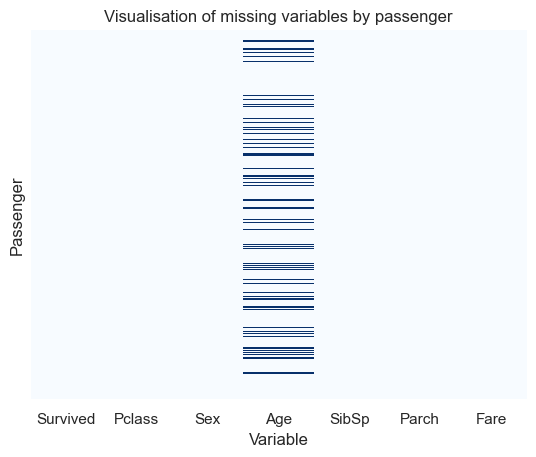

In [39]:
(sns
 .heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap = "Blues")
 .set(
    title = "Visualisation of missing variables by passenger",
    xlabel = "Variable",
    ylabel = "Passenger"))

<Axes: xlabel='Sex', ylabel='Age'>

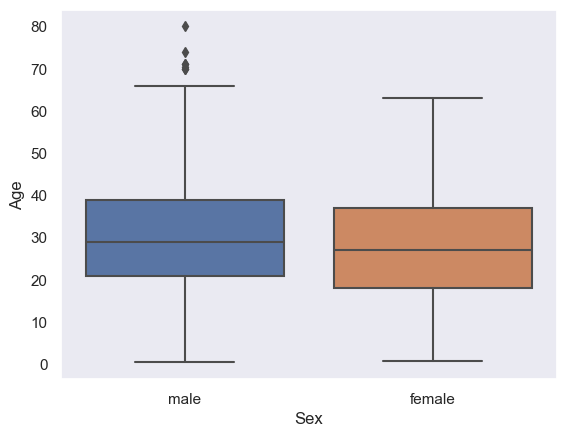

In [21]:
sns.boxplot(x = "Sex", y = "Age", data = titanic_df)

In [22]:
def fillAge(data):
    age = data[0]
    sex = data[1]

    if pd.isnull(age):
        if sex == "male":
            return 29
        else:
            return 25
    else:
        return age

In [23]:
titanic_df["Age"] = titanic_df[["Age", "Sex"]].apply(fillAge, axis = 1)

<Axes: >

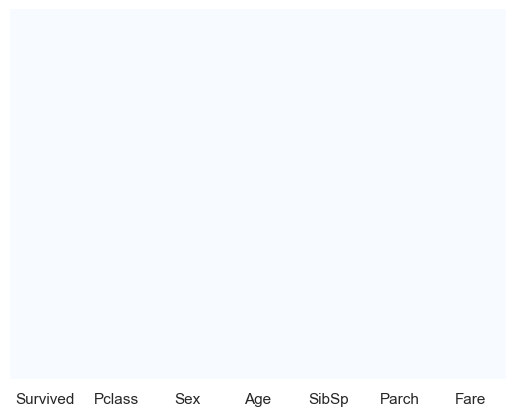

In [24]:
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap = "Blues")

In [25]:
pd.get_dummies(titanic_df["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [26]:
male = pd.get_dummies(titanic_df["Sex"], drop_first = True)

In [27]:
titanic_df.drop("Sex", axis = 1, inplace = True)
titanic_df = pd.concat([titanic_df, male], axis = 1)
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,25.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


## Data modelling

In [28]:
X = titanic_df.drop("Survived", axis = 1).values
y = titanic_df["Survived"].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [31]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

<Axes: >

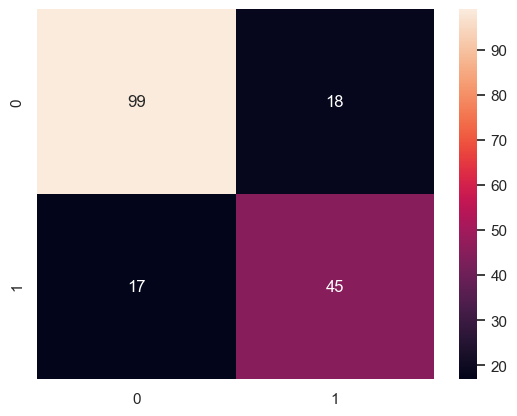

In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True, fmt = "d")

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.71      0.73      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.81      0.80      0.80       179



In [34]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()

classifier.fit(X_train, y_train)

MultinomialNB()

<Axes: >

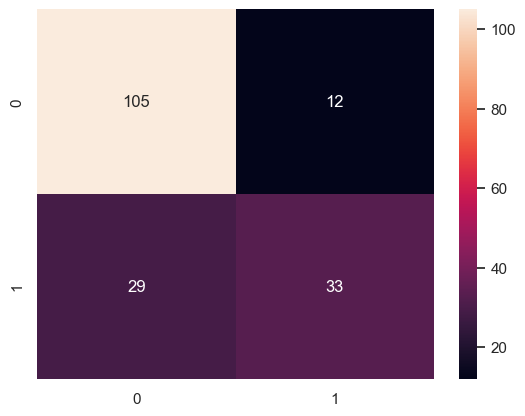

In [35]:
y_predict_test = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True, fmt = "d")

In [36]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       117
           1       0.73      0.53      0.62        62

    accuracy                           0.77       179
   macro avg       0.76      0.71      0.73       179
weighted avg       0.77      0.77      0.76       179



              precision    recall  f1-score   support

           0       0.87      0.86      0.87       117
           1       0.75      0.76      0.75        62

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



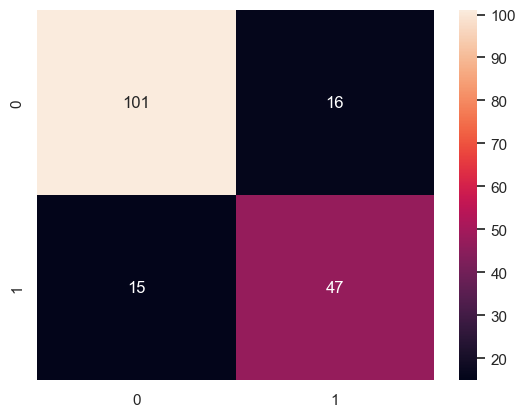

In [44]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, y_train)
y_predict_test = random_forest.predict(X_test)

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True, fmt = "d")

print(classification_report(y_test, y_predict_test))